In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import constants as const
import db_operations as dbop
import data_prepare as dp
import ml_model
import customized_obj as cus_obj

import xgboost.sklearn as xgb
import lightgbm.sklearn as lgbm
import sklearn.preprocessing as preproc
import sklearn.metrics as metrics

import datetime
import time

2018-01-01 2011-02-27 2009-02-07
start: 2009-02-07


min_date: 2009-02-09


           code  symbol       name  area industry             fullname  \
0     000001.SZ  000001       平安银行    深圳       银行           平安银行股份有限公司   
1     000002.SZ  000002        万科A    深圳     全国地产           万科企业股份有限公司   
2     000004.SZ  000004       国农科技    深圳     生物制药       深圳中国农大科技股份有限公司   
3     000005.SZ  000005       世纪星源    深圳     房产服务         深圳世纪星源股份有限公司   
4     000006.SZ  000006       深振业A    深圳     区域地产      深圳市振业(集团)股份有限公司   
5     000007.SZ  000007        全新好    深圳     酒店餐饮         深圳市全新好股份有限公司   
6     000008.SZ  000008       神州高铁    北京     运输设备         神州高铁技术股份有限公司   
7     000009.SZ  000009       中国宝安    深圳      综合类         中国宝安集团股份有限公司   
8     000010.SZ  000010       美丽生态    深圳     建筑施工         深圳美丽生态股份有限公司   
9     000011.SZ  000011       深物业A    深圳     区域地产    深圳市物业发展(集团)股份有限公司   
10    000012.SZ  000012        南玻A    深圳       玻璃         中国南玻集团股份有限公司   
11    000014.SZ  000014       沙河股份    深圳     全国地产           沙河实业股份有限公司   
12    000016.SZ  000016       深康佳A    

count stck 58
(121078, 537)
(121078, 537)


(2411, 395) 2411


date
date


['date', 'code', 'open', 'high', 'low', 'close', 'vol', 'amt', 'adj_factor', 'open0', 'high0', 'low0', 'close0', 'vol0', '(open/p1mv_open-1)', '(high/p1mv_high-1)', '(low/p1mv_low-1)', '(close/p1mv_close-1)', '(vol/p1mv_vol-1)', '(amt/p1mv_amt-1)', '(open/p2mv_open-1)', '(high/p2mv_high-1)', '(low/p2mv_low-1)', '(close/p2mv_close-1)', '(vol/p2mv_vol-1)', '(amt/p2mv_amt-1)', '(open/p3mv_open-1)', '(high/p3mv_high-1)', '(low/p3mv_low-1)', '(close/p3mv_close-1)', '(vol/p3mv_vol-1)', '(amt/p3mv_amt-1)', '(open/p4mv_open-1)', '(high/p4mv_high-1)', '(low/p4mv_low-1)', '(close/p4mv_close-1)', '(vol/p4mv_vol-1)', '(amt/p4mv_amt-1)', '(open/p5mv_open-1)', '(high/p5mv_high-1)', '(low/p5mv_low-1)', '(close/p5mv_close-1)', '(vol/p5mv_vol-1)', '(amt/p5mv_amt-1)', '(high-low)/avg', '(close-open)/avg', '(high-open)/avg', '(low-open)/avg', '(high-close)/avg', '(low-close)/avg', 'upper_shadow/avg', 'lower_shadow/avg', 'p1mv_(high-low)/avg', 'p1mv_(close-open)/avg', 'p1mv_(high-open)/avg', 'p1mv_(low-op

(124685, 945)


df_all: (100849, 945)


y<-0.5: 0
-0.50<=y<-0.40: 0
-0.40<=y<-0.30: 0
-0.30<=y<-0.20: 0
-0.20<=y<-0.10: 0
-0.10<=y<0.00: 0
0.00<=y<0.10: 62248
0.10<=y<0.20: 23955
0.20<=y<0.30: 7955
0.30<=y<0.40: 2857
0.40<=y<0.50: 1189
y>0.5 1483
mean: 0.10696462612000973 median: 0.07186358099878198 std: 0.20736407305880303


过滤一字涨停项或停牌（最高价=最低价）： 5423
y<-0.5: 0
-0.50<=y<-0.40: 0
-0.40<=y<-0.30: 0
-0.30<=y<-0.20: 0
-0.20<=y<-0.10: 0
-0.10<=y<0.00: 0
0.00<=y<0.10: 63795
0.10<=y<0.20: 23486
0.20<=y<0.30: 7667
0.30<=y<0.40: 2634
0.40<=y<0.50: 1056
y>0.5 1049
mean: 0.09791940650237696 median: 0.06829765545361877 std: 0.10694818690099214


y<-0.5: 259
-0.50<=y<-0.40: 449
-0.40<=y<-0.30: 1373
-0.30<=y<-0.20: 4789
-0.20<=y<-0.10: 22686
-0.10<=y<0.00: 64837
0.00<=y<0.10: 5296
0.10<=y<0.20: 0
0.20<=y<0.30: 0
0.30<=y<0.40: 0
0.40<=y<0.50: 0
y>0.5 0
mean: -0.0796096920371081 median: -0.05891980360065474 std: 0.07847995954033013


过滤一字涨停项或停牌（最高价=最低价）： 5423
y<-0.5: 187
-0.50<=y<-0.40: 373
-0.40<=y<-0.30: 1281
-0.30<=y<-0.20: 4624
-0.20<=y<-0.10: 22225
-0.10<=y<0.00: 64099
0.00<=y<0.10: 6900
0.10<=y<0.20: 0
0.20<=y<0.30: 0


0.30<=y<0.40: 0
0.40<=y<0.50: 0
y>0.5 0
mean: -0.0770435886078886 median: -0.05691056910569103 std: 0.07570283877911503


(100849, 922) (100849, 3) Index(['y_l_rise', 'y_l_decline', 'y_l'], dtype='object')


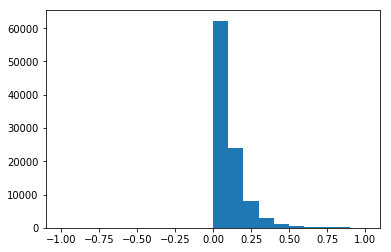

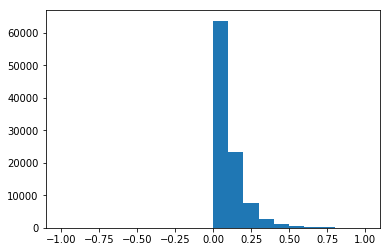

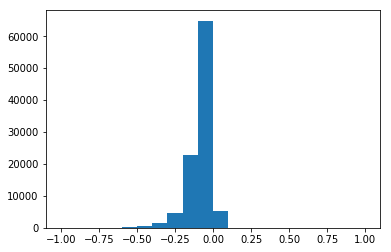

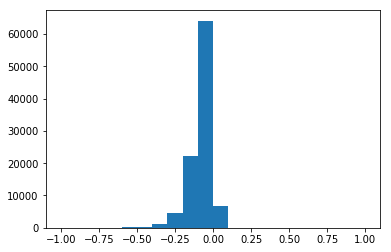

In [2]:
targets = [{"period": 20, "fun": "max", "col": "high"},
           {"period": 20, "fun": "min", "col": "low"},
           # {"period": 5, "fun": "max", "col": "high"},
           # {"period": 5, "fun": "min", "col": "low"},
           # {"period": 20, "fun": "mean", "col": ""}
           ]

time_delta = datetime.timedelta(days=1)
test_start = "2018-01-01"
train_length = 2500
max_feature_length = 750

train_bound = datetime.datetime.strptime(test_start, const.DATE_FORMAT) - train_length * time_delta
train_bound = datetime.datetime.strftime(train_bound, const.DATE_FORMAT)

lower_bound = datetime.datetime.strptime(train_bound, const.DATE_FORMAT) - max_feature_length * time_delta
lower_bound = datetime.datetime.strftime(lower_bound, const.DATE_FORMAT)
print(test_start,train_bound,lower_bound)

df_all, cols_future, cols_category,cols_not_for_model = ml_model.gen_data(
    targets=targets,
                                        lower_bound=lower_bound,
                                        start=train_bound,
                                        stock_pool=None)

print("df_all:", df_all.shape)
trading_date_idxes = df_all.index.unique().sort_values(ascending=True)

X = ml_model.gen_X(df_all, cols_future+cols_not_for_model)

paras = [("y_l_rise", {"pred_period": 20, "is_high": True, "is_clf": False,"threshold":0.2}, df_all),
         ("y_l_decline", {"pred_period": 20, "is_high": False, "is_clf": False, "threshold":0.2}, df_all),
         # ("y_s_rise", {"pred_period": 5, "is_high": True, "is_clf": False,"threshold":0.1}, df_all),
         # ("y_s_decline", {"pred_period": 5, "is_high": False, "is_clf": False,"threshold":0.1}, df_all),
         ]

# paras = [("y_l", {"pred_period": 20, "is_high": True, "is_clf": False,
#                        "threshold":0.1}, df_all)]
Y = pd.concat([ml_model.gen_y(v2, **v1) for k, v1, v2 in paras], axis=1)
Y.columns = [k for k, _, _ in paras]
Y.index = X.index
Y["y_l"] = Y.apply(
    lambda r:r["y_l_rise"] if r["y_l_rise"]> -r["y_l_decline"] else r["y_l_decline"],
    axis=1)
print(X.shape, Y.shape, Y.columns)


(100675, 917)
Index(['code', 'f19max_f2mv_high', 'f1mv_close', 'f1mv_high', 'f1mv_low',
       'f1mv_open', 'f1mv_qfq_close', 'f1mv_qfq_high', 'f1mv_qfq_low',
       'f1mv_qfq_open', 'f20min_f1mv_low', 'qfq_close', 'qfq_high', 'qfq_low',
       'qfq_open'],
      dtype='object')


(array([    0.,     0.,     0.,    32.,   155.,   373.,  1273.,  4500.,
        19975., 16991., 22343., 21640.,  7503.,  2623.,  1056.,   491.,
          241.,   141.,    88.,    44.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

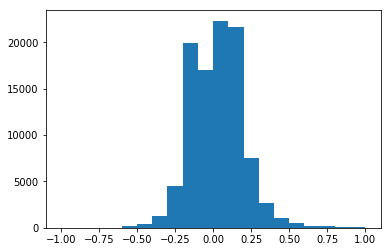

In [3]:
print(X.shape)
print(df_all.columns.difference(X.columns))
plt.hist(Y["y_l"].dropna(),bins=np.arange(-10,11)*0.1)

In [4]:
# Y is contiguous.
for col in Y.columns:
    print(col, Y[col].mean(),Y[col].median(),Y[col].std())

y_l_rise 0.09569256423767561 0.06781566129636563 0.10901812875705962
y_l_decline -0.07704752555107086 -0.056862745098039236 0.07573926618428459
y_l 0.02367916798882663 0.03822937625754519 0.17273475797069934


In [5]:
train_date_idx = trading_date_idxes[trading_date_idxes<"2017-01-01"][:-21]
print(train_date_idx[0],train_date_idx[-1])
test_date_idx = trading_date_idxes[(trading_date_idxes>="2017-01-01")][:-24]
print(test_date_idx[0],test_date_idx[-1])

ycol = "y_l"
X_train = X.loc[train_date_idx]
Y_train = Y.loc[train_date_idx]
print(X_train.shape, Y_train[ycol].shape)
X_test = X.loc[test_date_idx]
Y_test = Y.loc[test_date_idx]
print(X_test.shape, Y_test.shape)


2011-02-28 2016-12-01
2017-01-03 2018-11-21


(72349, 917) (72349,)
(25800, 917) (25800, 3)


In [6]:
models={}

In [25]:

# models = {"model_l_high":
#               xgb.XGBClassifier(n_estimators=150, 
#                                   scale_pos_weight=1,
#                                 max_depth=5,
#                                  random_state=0, 
#                                   )
#           }

models["model_l_high"]=lgbm.LGBMClassifier(n_estimators=30, 
                                  scale_pos_weight=1,
                                 num_leaves=64, 
                                max_depth=8,
                                 random_state=0, 
                                min_child_samples=20,
                                  )
          

y_train = ml_model.label(Y_train[ycol],threshold=0.15,is_high=True)
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

t1 = time.time()
models["model_l_high"].fit(X_train, y_train)
t2 = time.time()
print(t2-t1)
Y_test_pred ={ycol: models["model_l_high"].predict_proba(X_test)[:,1]}


78.3270001411438


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=8, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=30,
        n_jobs=-1, num_leaves=64, objective=None, random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


781 (0.0017869685491264144, 0.0, 0.0196784538425522, 0.40542133176193307, -0.0802784222737819)
1710 (0.05386594665278017, 0.037338541666666614, 0.05928159829582074, 0.46347826086956534, -0.07043407043407057)
4228 (0.07411173725992358, 0.056048587659362714, 0.07320788490381518, 0.8043636363636364, -0.12865267699548932)
4905 (0.08498451283253235, 0.06495335328287277, 0.0844883485564575, 0.8832684824902723, -0.09234608985024961)
4190 (0.08855994882126494, 0.06896776502608803, 0.08806563656192254, 0.8724528301886791, -0.19402173913043474)
3305 (0.09120448303750107, 0.07098121085595, 0.08792687472357531, 0.6553672316384183, -0.11646136618141101)
2281 (0.09833946597301156, 0.0726086956521741, 0.09894210821771089, 0.7660103626587744, -0.10780487804878058)
1529 (0.09985295195556354, 0.07685799654449066, 0.09982384758165438, 0.6616257088846884, -0.0632380952380952)
932 (0.09520443086642888, 0.07073569055827711, 0.0960636104784121, 0.597989949748744, -0.0708556149732621)
549 (0.0997234051263998,

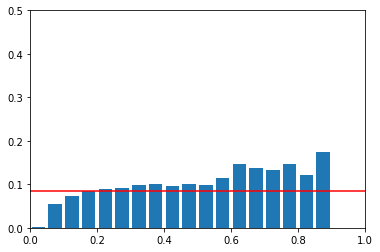

In [26]:
print(models["model_l_high"])

interval = 0.05
n = int(1/interval)
x0 = np.arange(n+1)*interval
y0 = np.ones(x0.shape)* Y_test[ycol].mean()

y1 = []
cnt1 = []
for i in range(n):
    p0 = i*interval
    p1 = (i+1)*interval
    cond=(p0 < Y_test_pred[ycol]) & (Y_test_pred[ycol] <=p1)
    cnt1.append(sum(cond))
    y1.append((Y_test[ycol][cond].mean(), Y_test[ycol][cond].median(),Y_test[ycol][cond].std(),Y_test[ycol][cond].max(),Y_test[ycol][cond].min()))
for c,p in zip(cnt1,y1):
    print(c,p)

plt.bar(np.arange(len(y1))*interval+interval/2,[mean for mean,_, _,_,_ in y1],width=interval*0.8)
plt.plot(x0,y0,color='r')
# plt.plot(x,y1,color='r')
plt.xlim(0,1)
plt.ylim(0,0.5)
plt.show()


In [12]:
cond = Y_test_pred[ycol]>0.7
print(Y_test[ycol][cond].mean())
print(sum(cond),Y_test[ycol][cond].mean(), Y_test[ycol][cond].median(),Y_test[ycol][cond].std(),Y_test[ycol][cond].max(),Y_test[ycol][cond].min())

df_combined = df_all.loc[test_date_idx][["code","open0","open","f1mv_open"]]
df_combined["rise"] = Y_test[ycol].copy()
df_combined["pred"] = Y_test_pred[ycol].copy()
for code, df in df_combined[cond].groupby("code"):
    print("\n",df)

0.19150086981583767
6 0.19150086981583767 0.1749581416624233 0.14266972179444173 0.3796449704142011 0.04947916666666674

                  code  open0       open   f1mv_open     rise     pred
2017-06-14  000002.SZ   21.9  2907.9258  2822.94532  0.25588  0.73034

                  code  open0     open  f1mv_open      rise      pred
2018-02-06  002446.SZ    7.2  35.6184   34.67847  0.312411  0.744096

                  code  open0      open  f1mv_open      rise      pred
2017-06-02  600401.SH   1.39  26.22652   26.22652  0.057554  0.718362

                  code  open0     open  f1mv_open      rise      pred
2017-05-24  600536.SH   19.3  101.518    100.992  0.049479  0.705735

                  code  open0     open  f1mv_open      rise      pred
2017-05-09  603799.SH   44.0  44.2640    43.8616  0.094037  0.731686
2017-05-23  603799.SH   42.7  42.9562    42.5035  0.379645  0.730326


In [104]:

k = 15
models["model_l_high_reg"] = lgbm.LGBMRegressor(
    n_estimators=60, num_leaves=32,
    max_depth=8,
    random_state=0,
    min_child_samples=20,
    min_split_gain=0,
    learning_rate=0.1,
    # min_child_weight=0,
    objective = "huber",
    ca
    # alpha = 0.5
    # reg_lambda=1e-5
)


In [105]:

# models["model_l_high_reg"] = xgb.XGBRegressor(
#     n_estimators=30,
#     max_depth=5,
#     random_state=0,
#     gamma= 0.5,
#     learning_rate=0.05,
#     min_child_weight=20,
#     objective = cus_obj.smooth_l1_obj_generator(k),
#     # reg_lambda=1e-5
# )

sample_weight = np.abs(Y_train[ycol])
sample_weight = sample_weight/np.mean(sample_weight)+1
# print(sample_weight)


In [106]:

t1 = time.time()
models["model_l_high_reg"].fit(X_train, k*Y_train[ycol],\
                                         sample_weight=sample_weight)
# models["model_l_high_reg"].fit(X_train, Y_train[ycol])
t2 = time.time()
print(t2-t1)


60.235501527786255


In [20]:

Y_test_pred_reg ={ycol: models["model_l_high_reg"].predict(X_test)}
print(models["model_l_high_reg"].score(X_test,Y_test[ycol]))


53.545000076293945


In [24]:
stacker = lgbm.LGBMClassifier(
    n_estimators=60, num_leaves=32,
    scale_pos_weight=1,
    max_depth=8,
    random_state=0,
    min_child_samples=20,
    min_split_gain=0.5,
)


C:\Users\dell-pc\Anaconda3.6\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(16568,)


1292 (0.0564942141165419, 0.025359140081381515, 0.07957201925528411, 0.49437299035369775, -0.014883061658398145)
3497 (0.09504616791963497, 0.0726246105919004, 0.09024243654398367, 0.741324921135647, -0.09234608985024961)
3106 (0.09408139306308058, 0.07244620752160258, 0.08945663814447036, 0.7047560222359481, -0.09142053445850917)
2325 (0.08616052449963223, 0.06269592476489039, 0.08869867514290783, 0.6974169741697416, -0.058252427184466105)
2245 (0.08677626347111263, 0.06336206896551722, 0.08857897064228236, 0.7660103626587744, -0.04995196926032652)
2344 (0.09731225216002441, 0.07690981432360733, 0.0895432363424026, 0.597989949748744, -0.0632380952380952)
1277 (0.09841958194967271, 0.07598944591029033, 0.0909535346164598, 0.5143859649122804, -0.06426056338028152)
450 (0.0868233603157824, 0.06349306651094266, 0.08943101591540087, 0.476747587013747, -0.10578478964401283)
20 (0.10391456215211621, 0.07400945030202, 0.09942987060625445, 0.31241084165477906, -0.0139113555483662)
12 (0.060183

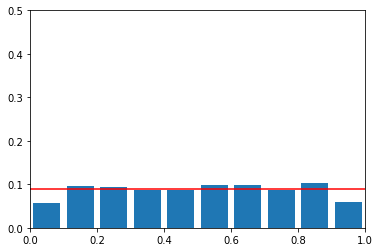

In [174]:

import sklearn as sk
enc = sk.preprocessing.OneHotEncoder()
pred_leaves_train = models["model_l_high_reg"].predict(X_train, pred_leaf=True)
pred_reg_train = models["model_l_high_reg"].predict(X_train).reshape(-1, 1)
pred_leaves_train = enc.fit_transform(pred_leaves_train)
print(pred_leaves_train.shape,X_train.shape, type(pred_leaves_train),
      type(X_train))
import scipy.sparse
features_train = scipy.sparse.hstack([X_train,pred_leaves_train])
print(features_train.shape, type(features_train))
features_train = scipy.sparse.hstack([features_train, pred_reg_train])
print(features_train.shape, type(features_train))


C:\Users\dell-pc\Anaconda3.6\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(16568,)


1292 (0.0564942141165419, 0.025359140081381515, 0.07957201925528411, 0.49437299035369775, -0.014883061658398145)
3497 (0.09504616791963497, 0.0726246105919004, 0.09024243654398367, 0.741324921135647, -0.09234608985024961)
3106 (0.09408139306308058, 0.07244620752160258, 0.08945663814447036, 0.7047560222359481, -0.09142053445850917)
2325 (0.08616052449963223, 0.06269592476489039, 0.08869867514290783, 0.6974169741697416, -0.058252427184466105)
2245 (0.08677626347111263, 0.06336206896551722, 0.08857897064228236, 0.7660103626587744, -0.04995196926032652)
2344 (0.09731225216002441, 0.07690981432360733, 0.0895432363424026, 0.597989949748744, -0.0632380952380952)
1277 (0.09841958194967271, 0.07598944591029033, 0.0909535346164598, 0.5143859649122804, -0.06426056338028152)
450 (0.0868233603157824, 0.06349306651094266, 0.08943101591540087, 0.476747587013747, -0.10578478964401283)
20 (0.10391456215211621, 0.07400945030202, 0.09942987060625445, 0.31241084165477906, -0.0139113555483662)
12 (0.060183

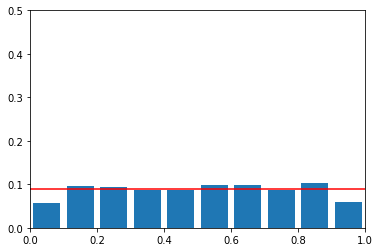

In [180]:
t1 = time.time()
stacker.fit(features_train,ml_model.label(Y_train[ycol],threshold=0.15))
# stacker.fit(features_train,Y_train[ycol])
t2 = time.time()
print(t2-t1)

C:\Users\dell-pc\Anaconda3.6\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(16568,)


1292 (0.0564942141165419, 0.025359140081381515, 0.07957201925528411, 0.49437299035369775, -0.014883061658398145)
3497 (0.09504616791963497, 0.0726246105919004, 0.09024243654398367, 0.741324921135647, -0.09234608985024961)
3106 (0.09408139306308058, 0.07244620752160258, 0.08945663814447036, 0.7047560222359481, -0.09142053445850917)
2325 (0.08616052449963223, 0.06269592476489039, 0.08869867514290783, 0.6974169741697416, -0.058252427184466105)
2245 (0.08677626347111263, 0.06336206896551722, 0.08857897064228236, 0.7660103626587744, -0.04995196926032652)
2344 (0.09731225216002441, 0.07690981432360733, 0.0895432363424026, 0.597989949748744, -0.0632380952380952)
1277 (0.09841958194967271, 0.07598944591029033, 0.0909535346164598, 0.5143859649122804, -0.06426056338028152)
450 (0.0868233603157824, 0.06349306651094266, 0.08943101591540087, 0.476747587013747, -0.10578478964401283)
20 (0.10391456215211621, 0.07400945030202, 0.09942987060625445, 0.31241084165477906, -0.0139113555483662)
12 (0.060183

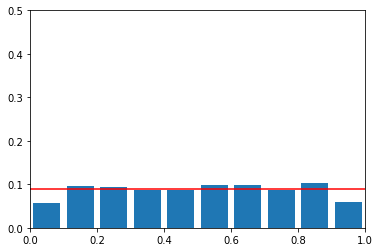

In [176]:
pred_leaves_test = models["model_l_high_reg"].predict(X_test, pred_leaf=True)
pred_reg_test = models["model_l_high_reg"].predict(X_test).reshape(-1, 1)
pred_leaves_test = enc.transform(pred_leaves_test)
print(pred_leaves_test.shape,X_test.shape, type(pred_leaves_test),
      type(X_test))
features_test = scipy.sparse.hstack([X_test, pred_leaves_test])
print(features_test.shape, type(features_test))
features_test = scipy.sparse.hstack([features_test, pred_reg_test])
print(features_test.shape, type(features_test))


C:\Users\dell-pc\Anaconda3.6\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


(16568,)


1292 (0.0564942141165419, 0.025359140081381515, 0.07957201925528411, 0.49437299035369775, -0.014883061658398145)
3497 (0.09504616791963497, 0.0726246105919004, 0.09024243654398367, 0.741324921135647, -0.09234608985024961)
3106 (0.09408139306308058, 0.07244620752160258, 0.08945663814447036, 0.7047560222359481, -0.09142053445850917)
2325 (0.08616052449963223, 0.06269592476489039, 0.08869867514290783, 0.6974169741697416, -0.058252427184466105)
2245 (0.08677626347111263, 0.06336206896551722, 0.08857897064228236, 0.7660103626587744, -0.04995196926032652)
2344 (0.09731225216002441, 0.07690981432360733, 0.0895432363424026, 0.597989949748744, -0.0632380952380952)
1277 (0.09841958194967271, 0.07598944591029033, 0.0909535346164598, 0.5143859649122804, -0.06426056338028152)
450 (0.0868233603157824, 0.06349306651094266, 0.08943101591540087, 0.476747587013747, -0.10578478964401283)
20 (0.10391456215211621, 0.07400945030202, 0.09942987060625445, 0.31241084165477906, -0.0139113555483662)
12 (0.060183

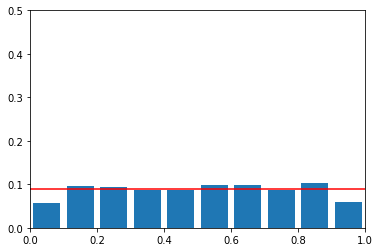

In [182]:
y_stacker_test = stacker.predict_proba(features_test)[:,1]
# y_stacker_test = stacker.predict(features_test)

print(y_stacker_test.shape)
y1 = []
cnt1 = []
for i in range(10):
    p0 = i*0.1
    p1 = (i+1)*0.1
    cond=(p0 < y_stacker_test) & (y_stacker_test <=p1)
    cnt1.append(sum(cond))
    y1.append((Y_test[ycol][cond].mean(), Y_test[ycol][cond].median(),Y_test[ycol][cond].std(),Y_test[ycol][cond].max(),Y_test[ycol][cond].min()))
for c,p in zip(cnt1,y1):
    print(c,p)

plt.bar(np.arange(len(y1))*0.1+0.05,[mean for mean,_, _,_,_ in y1],width=0.08)
plt.plot(x0,y0,color='r')
# plt.plot(x,y1,color='r')
plt.xlim(0,1)
plt.ylim(0,0.5)
plt.show()

-83.62003637251831
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=8, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0, n_estimators=60,
       n_jobs=-1, num_leaves=32, objective='huber', random_state=0,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)


0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
0 (nan, nan, nan, nan, nan)
8 (0.0, 0.0, 0.0, 0.0, 0.0)
1968 (0.057473772157953705, 0.03354987696960221, 0.08092014902350077, 0.7545388525780681, -0.18314559866499802)
4738 (0.08044926096555922, 0.060468546340124996, 0.09161749176193139, 0.8724528301886791, -0.09142053445850917)
10176 (0.08317435662870724, 0.06336994468176771, 0.08186046289900709, 0.8832684824902723, -0.19402173913043474)
7444 (0.09007473550895564, 0.0667629917071818, 0.09037443613499713, 0.6253333333333333, -0.11037410453701235)
1248 (0.09570755862615

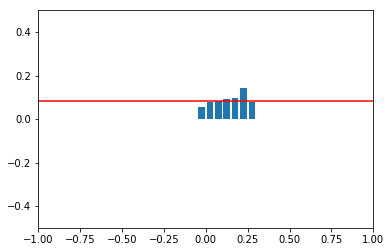

In [107]:
Y_test_pred_reg ={ycol: models["model_l_high_reg"].predict(X_test)/k}
print(models["model_l_high_reg"].score(X_test,Y_test[ycol]*k))
print(models["model_l_high_reg"])

interval = 0.05
n = int(1/interval)
x0 = np.arange(n+1)*interval
y0 = np.ones(x0.shape)* Y_test[ycol].mean()


ycol2 = "y_l_rise"


y1 = []
cnt1 = []
for i in range(-n,n):
    p0 = i*interval
    p1 = (i+1)*interval
    cond=(p0 < Y_test_pred_reg[ycol]) & (Y_test_pred_reg[ycol] <=p1)
    cnt1.append(sum(cond))
    y1.append((Y_test[ycol2][cond].mean(), Y_test[ycol2][cond].median(),
               Y_test[ycol2][cond].std(),Y_test[ycol2][cond].max(),Y_test[
                   ycol2][cond].min()))
for c,p in zip(cnt1,y1):
    print(c,p)

plt.bar(np.arange(-n,n)*interval+interval/2,[mean for mean,_, _,_,_ in y1],
        width=0.8*interval)

x0 = np.arange(-n,n+1)*interval
y0 = np.ones(x0.shape)* Y_test[ycol2].mean()
plt.plot(x0,y0,color='r')
# plt.plot(x,y1,color='r')
plt.xlim(-1,1)
plt.ylim(-0.5,0.5)
plt.show()


In [84]:
cond = Y_test_pred_reg[ycol]>0.25
print(Y_test[ycol2][cond].mean())
print(sum(cond),Y_test[ycol][cond].mean(), Y_test[ycol][cond].median(),Y_test[ycol][cond].std(),Y_test[ycol][cond].max(),Y_test[ycol][cond].min())

df_combined = df_all.loc[test_date_idx][["code","open0","open","f1mv_open"]]
df_combined["rise"] = Y_test["y_l_rise"].copy()
df_combined["pred"] = Y_test_pred_reg[ycol].copy()
for code, df in df_combined[cond].groupby("code"):
    print("\n",df)

0.18145129031875576
88 0.1258170520740194 0.182016398485488 0.1868335832882338 0.44268774703557323 -0.27145581691036236



                  code  open0       open  f1mv_open     rise      pred
2018-06-25  000063.SZ  13.48  212.80876   203.6523  0.36124  0.259249

                  code  open0     open  f1mv_open      rise      pred
2018-10-15  000636.SZ   13.0  220.194  228.83238  0.107328  0.250321
2018-10-29  000636.SZ   13.5  228.663  223.75098  0.101438  0.258331

                  code  open0      open  f1mv_open      rise      pred
2018-10-11  002217.SZ   5.42  30.63384   28.31652  0.061876  0.259973
2018-10-12  002217.SZ   5.01  28.31652   27.41220  0.096907  0.255455
2018-10-15  002217.SZ   4.85  27.41220   25.66008  0.171806  0.263490
2018-10-16  002217.SZ   4.54  25.66008   24.86880  0.209091  0.267828
2018-10-17  002217.SZ   4.40  24.86880   24.36012  0.234339  0.263989
2018-10-19  002217.SZ   4.31  24.36012   27.07308  0.110647  0.270725
2018-10-22  002217.SZ   4.79  27.07308   29.16432 -0.011628  0.285540
2018-10-23  002217.SZ   5.16  29.16432   28.31652 -0.009980  0.272794
2018-10-24  00221

In [22]:
print(len(set(X_train.columns)),len(X_train.columns))
print(X_train.columns)
# print(X_train.iloc[:50,[2,3]])
print(set(X_train.columns))

68 545
Index(['adj_factor', 'amt', 'change_rate_amt', 'change_rate_amt',
       'change_rate_amt', 'change_rate_amt', 'change_rate_amt',
       'change_rate_amt', 'change_rate_amt', 'change_rate_amt',
       ...
       'sz_change_rate_vol', 'sz_change_rate_vol', 'sz_change_rate_vol',
       'sz_close', 'sz_high', 'sz_low', 'sz_open', 'sz_vol', 'vol', 'vol0'],
      dtype='object', length=545)
{'hs300_change_rate_high', 'sz50_change_rate_high', 'sz50_open', 'cyb_change_rate_low', 'cyb_vol', 'sh_close', 'sz_change_rate_close', 'change_rate_close', 'low', 'hs300_close', 'close0', 'hs300_change_rate_close', 'cyb_change_rate_close', 'sz_open', 'vol0', 'sz_high', 'hs300_vol', 'sz50_change_rate_vol', 'close', 'hs300_change_rate_open', 'change_rate_high', 'change_rate_amt', 'hs300_open', 'sh_change_rate_vol', 'sz50_change_rate_low', 'hs300_high', 'sh_change_rate_open', 'hs300_low', 'open0', 'sh_change_rate_close', 'sh_change_rate_low', 'sz_change_rate_high', 'adj_factor', 'amt', 'high', 'sh_op